<a href="https://colab.research.google.com/github/juanmata8/article_classifiers_TFG/blob/main/FakeNewsCLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Pandas & numpy:
import numpy as np
import pandas as pd

# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# Text data cleaning:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer


# Gensim:
import gensim
from gensim.utils import simple_preprocess

from gensim import corpora

# ML models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# scikit-learn:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle
from sklearn.metrics import roc_auc_score

In [ ]:
true_df=pd.read_csv("/content/drive/MyDrive/datasets/fakeNewsEsp/onlytrue1000.csv")

fake_df=pd.read_csv("/content/drive/MyDrive/datasets/fakeNewsEsp/onlyfakes1000.csv")


true_df["fake_new_class"]=0 # Todas las noticias de este dataset son reales
fake_df["fake_new_class"]=1 # Todas las noticias de este dataset son falsas

df=pd.concat([true_df,fake_df],axis=0).reset_index(drop=True)


NameError: name 'pd' is not defined

In [ ]:
df.astype({'fake_new_class': 'category'}).dtypes

text                object
fake_new_class    category
dtype: object

In [ ]:
stop_words = pd.read_csv("/content/drive/MyDrive/datasets/fakeNewsEsp/stop_words_spanish.txt", sep=" ", header=None)
# stop_words = list(stop_words_txt)
stop_words

,0
0,a
1,actualmente
2,adelante
3,además
4,afirmó
...,...
603,éstos
604,última
605,últimas
606,último


In [ ]:
stop_words = stop_words.values.tolist()

NameError: name 'stop_words' is not defined

In [ ]:
stop_words_aux = pd.read_csv("/content/drive/MyDrive/datasets/fakeNewsEsp/stop_words_es.txt", sep=" ", header=None)
stop_words_aux = stop_words_aux.values.tolist()


In [ ]:
for i in stop_words_aux:
  if i not in stop_words:
    stop_words.append(i)

In [ ]:
def del_duplicates(x):
  return list(dict.fromkeys(x))


In [ ]:
def flatten_extend(matrix):
     flat_list = []
     for row in matrix:
         flat_list.extend(row)
     return flat_list




In [ ]:
stop_words = flatten_extend(stop_words)

In [ ]:
stop_words = del_duplicates(stop_words)

In [ ]:
stop_words = stop_words[:-17]

In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words:
            result.append(token)

    return result

In [ ]:
df['clean_text'] = df['text'].apply(preprocess)

In [ ]:
df['clean_joined'] = df['clean_text'].apply(lambda x: " ".join(x))

NameError: name 'df' is not defined

In [ ]:
X=df['clean_joined']
y=df['fake_new_class']

NameError: name 'df' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [ ]:
print(X_test.head(2))

NameError: name 'X_test' is not defined

In [ ]:
#data to csv
X_test.to_csv('X_test.csv', index=False)

In [ ]:
first_row = df.head(2)
print(first_row)

                                                text  fake_new_class  \
0   Algunas de las voces extremistas más conocida...               0   
1   Después de casi dos años y medio de luchas po...               0   

                                          clean_text  \
0  [voces, extremistas, conocidas, ee, uu, cuenta...   
1  [años, medio, luchas, políticas, judiciales, d...   

                                        clean_joined  
0  voces extremistas conocidas ee uu cuentas asoc...  
1  años medio luchas políticas judiciales donald ...  


In [ ]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

NameError: name 'CountVectorizer' is not defined

ahora, cada palabra está asociada a un número y tiene una frecuencia de aparición en cada noticia. Los modelos se hacen pasándoles la matriz dtm. Ejemplo: (0, 68) 1
Significa que para la noticia 0, hay 1 palabra de tipo 68

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train_dtm, y_train) # Instead of using X_train we use X_train_dtm
y_pred=model_1.predict(X_test_dtm) # # Instead of using X_test we use X_test_dtm
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

model_2 = XGBClassifier()
model_2.fit(X_train_dtm, y_train)
y_pred_model_2=model_2.predict(X_test_dtm)
score = metrics.accuracy_score(y_test, y_pred_model_2)
print("Accuracy: %.2f%%" % (score * 100.0))
precision = precision_score(y_test, y_pred_model_2)


model_3=LogisticRegression()
model_3.fit(X_train_dtm, y_train)
y_pred_model_3=model_3.predict(X_test_dtm)
accuracy = accuracy_score(y_test, y_pred_model_3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
precision = precision_score(y_test, y_pred_model_3)

clf = MultinomialNB(force_alpha=True)
clf.fit(X_train_dtm, y_train)
pred = clf.predict(X_test_dtm)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (score * 100.0))


NameError: name 'X_train_dtm' is not defined

In [ ]:
string_to_classify = "Se ha descubierto una nueva vacuna para el covid-19. "
string_to_classify += "Los cientificos afirman que no tendrá efectos secundarios."
string_to_classify += "Las noticas se encargarán de informar a la población."

X_to_classify = vect.transform([string_to_classify])

# Classify the vectorized string
predicted_class = clf.predict(X_to_classify)

print(predicted_class)

[1]


In [ ]:
def process_article(string_to_classify):
    X_to_classify = vect.transform([string_to_classify])
    predicted_class = clf.predict(X_to_classify)
    return predicted_class

string_to_classify = "Esquina barrio tienda pastillas alimento perecer"
# string_to_classify += "Los cientificos afirman que no tendrá efectos secundarios."
string_to_classify += "pajaros, reptiles mamiferos odiesa presidente"

print(process_article(string_to_classify))

[1]


In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "news_naive_bayes_model.pkl"

with open(model_pkl_file, 'wb') as file:
   pickle.dump((vect, clf), file)

Confusion Matrix:
[[153  46]
 [ 50 151]]


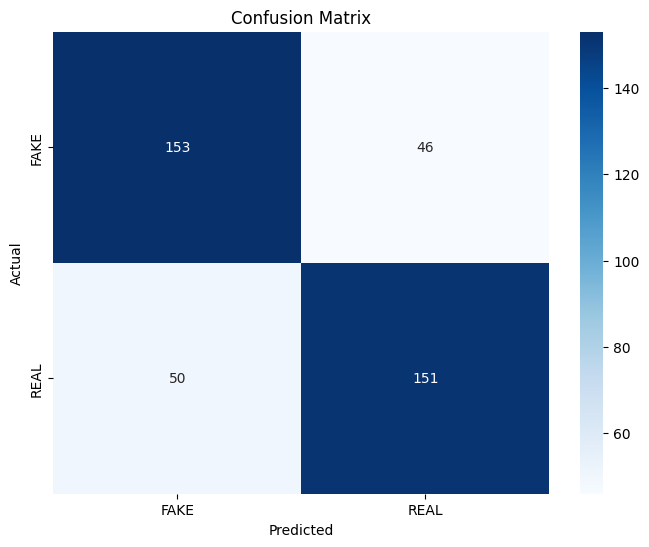

In [ ]:
# Create and print the confusion matrix
confusion_mat = metrics.confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(confusion_mat)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#['FAKE', 'REAL']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler(with_mean=False)), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

[3]


In [ ]:
print(X_train)

968     socialistas reúnen cargos jornadas grupo socia...
240     brasil registrado año incendios fuegos produci...
819     sevilla abr paro bajó personas trimestre año a...
692     víctima años permanece hospitalizada agresión ...
420     partido ultraderechista vox fichado periodista...
                              ...                        
1130    justamente leí decía dinamarca prohíbe voto pe...
1294    papa francisco vaticano anunció año casamiento...
860     equipo montañeros encargado limpieza everest r...
1459    famoso blue monday día triste año psicólogo br...
1126    atención burundanga lapiceros llévese lindo la...
Name: clean_joined, Length: 1600, dtype: object


In [ ]:
with open('test_set.csv', 'w') as file:
    file.write(X_train)

TypeError: write() argument must be str, not Series

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# assign documents
d0 = 'La mejor opción es seguir el camino y no seguir la colina'
d1 = 'La peor estrategia es seguir el río'
d2 = 'Nadie debe seguir la colina'

# merge documents into a single corpus
string = [d0, d1, d2]


# create object
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(string)


# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)



idf values:
camino : 1.6931471805599454
colina : 1.2876820724517808
debe : 1.6931471805599454
el : 1.2876820724517808
es : 1.2876820724517808
estrategia : 1.6931471805599454
la : 1.0
mejor : 1.6931471805599454
nadie : 1.6931471805599454
no : 1.6931471805599454
opción : 1.6931471805599454
peor : 1.6931471805599454
río : 1.6931471805599454
seguir : 1.0
